In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
def showImage(imagename):
    x = plt.imread(imagename)
    ax = plt.gca()
    ax.set_title(imagename.upper(), fontsize = 10 )
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    plt.imshow(x)

<img src= 'kimetsu.jpg'  style ="margin:auto"/>
<p style = 'text-align: center'>
    <b>PREPARING THE DATA</b>
</p>

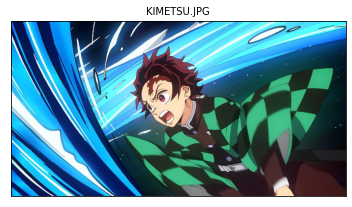

In [133]:
showImage('kimetsu.jpg')

In [3]:
anime_raw_data = pd.read_csv("C:\\Users\\peter\\Desktop\\RECOMMMENDATION SYS\\12000\\anime.csv")
rating_data = pd.read_csv("C:\\Users\\peter\\Desktop\\RECOMMMENDATION SYS\\12000\\rating.csv")
print('Shape of  anime data row by column is ' + str(anime_raw_data.shape))
print(anime_raw_data.info())
print('Shape of  rating data row by column is ' + str(rating_data.shape))
print(rating_data.info())

Shape of  anime data row by column is (12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None
Shape of  rating data row by column is (7813737, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


In [4]:
#Fusion
anime_combined_data = pd.merge(anime_raw_data, rating_data, on='anime_id',suffixes=['','_user'])
anime_combined_data = anime_combined_data.rename(columns={'name': 'anime_title','rating_user':'user_rating'})
anime_combined_data.head(10)

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,490,10
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548,10


Text(0, 0.5, 'User ratings Count')

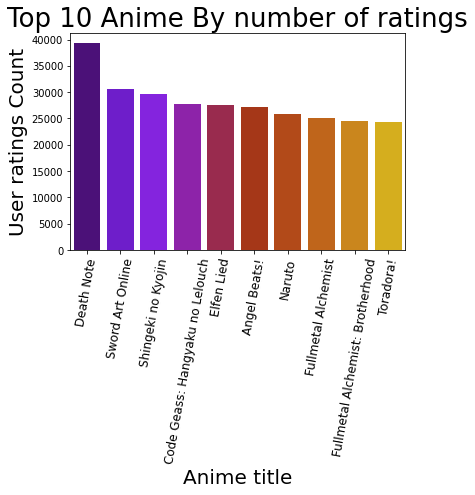

In [5]:
#Drop anime without name
anime_cobined_rating = anime_combined_data.dropna(axis=0, subset=['anime_title'])
anime_ratings_count = anime_cobined_rating.groupby(by=['anime_title'])['user_rating'].count().reset_index().rename(columns={'user_rating':'total_ratings'})

top10anime = anime_ratings_count.sort_values(by= 'total_ratings', ascending=False).head(10)
ax = sb.barplot(x = 'anime_title', y = 'total_ratings', data=top10anime, palette='gnuplot')
ax.set_title('Top 10 Anime By number of ratings', fontsize = 26)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80, fontsize = 12)
ax.set_xlabel('Anime title',fontsize = 20)
ax.set_ylabel('User ratings Count',fontsize = 20)

Text(0.5, 1.0, 'Top 10 Anime By Number of Members')

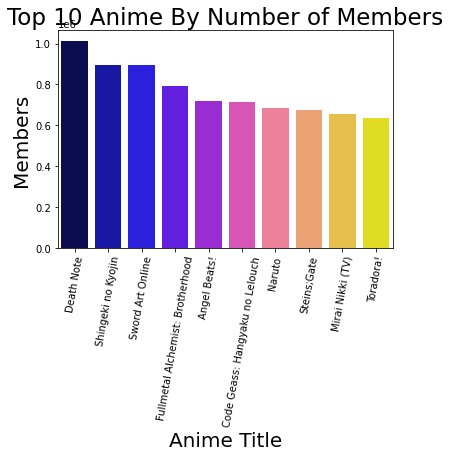

In [6]:
#TOP ANIME BASED ON MEMBERS
anime_based_members = anime_combined_data.copy()
anime_based_members = anime_based_members.drop_duplicates(subset='anime_title', keep='first')
anime_based_members = anime_based_members[['anime_title','members']].sort_values(by = 'members',ascending=False).head(10)
ax = sb.barplot(x = 'anime_title', y ='members',data=anime_based_members ,palette ='gnuplot2')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 80,fontsize = 10)
ax.set_ylabel('Members',fontsize = 20)
ax.set_xlabel('Anime Title',fontsize = 20)
ax.set_title('Top 10 Anime By Number of Members',fontsize = 23)


<AxesSubplot:title={'center':'user ratings'}>

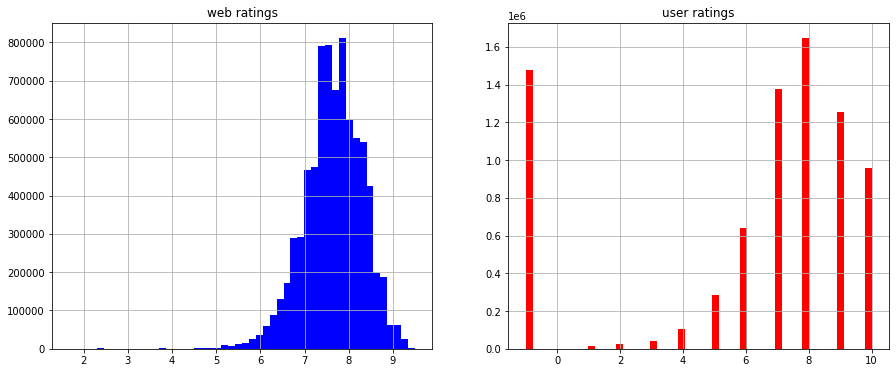

In [7]:
#Distribution of ratings
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('web ratings')
anime_cobined_rating['rating'].hist(color = 'b', bins=50)
plt.subplot(1,2,2)
plt.title('user ratings')
anime_cobined_rating['user_rating'].hist(color ='r',bins = 50)

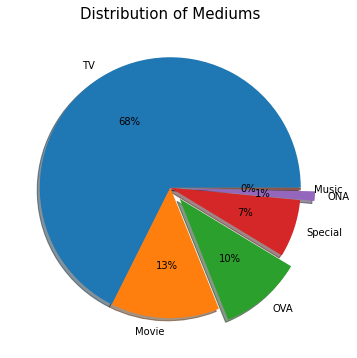

In [8]:
#Medium of watching
plt.figure(figsize=(8,6))
mediums = anime_combined_data['type'].value_counts().index
mediums_values = anime_combined_data['type'].value_counts().values
explode = [0,0,0.11,0,0.11,0]
plt.pie(mediums_values, labels=mediums , shadow = True, explode=explode, autopct = '%.0f%%')
plt.title("Distribution of Mediums",fontsize = 15)
plt.show()

In [9]:
anime_cleaned_data = anime_combined_data.copy()
anime_cleaned_data['user_rating'].replace({-1:np.nan}, inplace=True)
anime_cleaned_data = anime_cleaned_data.dropna(axis=0, how= 'any')
anime_cleaned_data.head(9)

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10.0
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10.0
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8.0
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,490,10.0
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548,10.0


<img src= 'kakashi.jpg'  style ="margin:auto"/>
<p style = 'text-align: center'>
    <b>PREPARING THE DATA</b>
</p>

In [10]:
user_counts = anime_cleaned_data['user_id'].value_counts()
anime_cleaned_feature = anime_cleaned_data[anime_cleaned_data['user_id'].isin(user_counts[user_counts>=200].index)]
anime_cleaned_feature.head(10)


,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8.0
11,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10.0
14,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,784,9.0
15,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,786,10.0
17,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,894,9.0
21,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,937,10.0
22,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,979,10.0
23,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,996,7.0


In [11]:
anime_cleaned_pivot = anime_cleaned_feature.pivot_table(index='anime_title', columns= 'user_id', values='user_rating').fillna(0)
anime_cleaned_pivot.head()

user_id,5,7,17,38,43,46,123,129,139,160,...,73406,73417,73422,73457,73460,73476,73499,73502,73503,73507
anime_title,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
anime_cleaned_pivot.values.shape

(9785, 8713)

In [27]:
anime_matrix = csr_matrix(anime_cleaned_pivot.values) 
knn_model = NearestNeighbors(metric = 'cosine', algorithm='brute')
knn_model.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [82]:
random_anime_index = np.random.choice(anime_cleaned_pivot.shape[0])
print (f'Anime to test:{random_anime_index}')
distances ,indices = knn_model.kneighbors(anime_cleaned_pivot.iloc[random_anime_index, :].values.reshape(1,-1), n_neighbors=6)

Anime to test:1729


In [83]:
for i in range (0,len(distances.flatten())):
    if i == 0 :
        print(f"Recommendations for :{anime_cleaned_pivot.index[random_anime_index]}")
    else:
        print(f'{i} : {anime_cleaned_pivot.index[indices.flatten()[i]]} with distance of {distances.flatten()[i]}')

Recommendations for :Detective Conan OVA 06: Follow the Vanished Diamond! Conan &amp; Heiji vs. Kid!
1 : Detective Conan OVA 04: Conan and Kid and Crystal Mother with distance of 0.10413917251623406
2 : Detective Conan OVA 07: A Challenge from Agasa! Agasa vs. Conan and the Detective Boys with distance of 0.12301227470746667
3 : Detective Conan OVA 05: The Target is Kogoro! The Detective Boys&#039; Secret Investigation with distance of 0.1322688683744232
4 : Detective Conan OVA 03: Conan and Heiji and the Vanished Boy with distance of 0.1339797549711952
5 : Detective Conan OVA 02: 16 Suspects with distance of 0.15826264288479397


<p style = 'text-align: center'>
    <b>CONTENT BASED RECOMMENDATION</b>
</p>

<img src= 'success.jpg'  style ="margin:auto"/>

In [117]:
import re

def anime_title_cleaning(anime_title):
    anime_title = re.sub(r'&quot;','',anime_title)
    anime_title = re.sub(r'.hack//','',anime_title)
    anime_title = re.sub(r'&#039;','',anime_title)
    anime_title = re.sub(r'A&#039;s','',anime_title)
    anime_title = re.sub(r'I&#039;','',anime_title)
    anime_title = re.sub(r'&amp;','',anime_title)
    return anime_title

In [118]:
anime_raw_data['name'] = anime_raw_data['name'].apply(anime_title_cleaning)

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(max_df=3, max_features=None, strip_accents='unicode', analyzer='word', token_pattern = r'\w{1,}', ngram_range=(1, 3), stop_words='english')
genres = anime_raw_data['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres)
tfv.get_feature_names_out()

array(['action adventure dementia', 'action adventure hentai',
       'action adventure magic', ..., 'supernatural yaoi',
       'thriller vampire', 'vampire yaoi'], dtype=object)

In [120]:
from sklearn.metrics.pairwise import  sigmoid_kernel
sig = sigmoid_kernel(tfv_matrix,tfv_matrix)
indices = pd.Series(anime_raw_data.index, index = anime_raw_data['name'])

In [121]:
def give_content_recommendation(title,sig=sig):
    index = indices[title]

    #Pairwise similarity scores
    sig_scores = list(enumerate (sig[index]))

    #sort 
    sig_scores = sorted(sig_scores, key= lambda x:x[1], reverse = True)

    #top 10 similar
    sig_scores = sig_scores[1:11]
    anime_indices = [i[0] for i in sig_scores]

    return pd.DataFrame({'Anime name':anime_raw_data['name'].iloc[anime_indices].values, 'Rating':anime_raw_data['rating'].iloc[anime_indices].values })

In [132]:
give_content_recommendation('Shingeki no Kyojin')

,Anime name,Rating
0,Fullmetal Alchemist: Brotherhood,9.26
1,Gintama°,9.25
2,Steins;Gate,9.17
3,Gintama,9.16
4,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,9.15
5,Hunter x Hunter (2011),9.13
6,Ginga Eiyuu Densetsu,9.11
7,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,9.10
8,Gintama: Enchousen,9.11
9,Clannad: After Story,9.06
